In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install bert-embedding

     |████████████████████████████████| 215kB 5.2MB/s 
     |████████████████████████████████| 13.8MB 46.0MB/s 
     |████████████████████████████████| 29.6MB 1.4MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp36-none-any.whl size=259917 sha256=a704d4ba8c7c973bf8b94fcefc70de94a5a541a300e1c2eadfc798bd477b5ecc
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: spacy 2.1.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.57 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: cvxpy 1.0.24 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: blis 0.2.4 has re

In [0]:
!pip install --upgrade numpy
import tarfile
import pandas as pd
import numpy as np
import scipy as sp

import spacy
from bert_embedding import BertEmbedding
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 20.4MB 3.5MB/s 
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.17.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bert-embedding 1.0.1 has requirement numpy==1.14.6, but you'll have numpy 1.17.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Datasets/ShortAnswerGrading_v1.0.tar.gz'

In [0]:
with tarfile.open(path,'r') as ext_file:
  ext_file.extractall('/content/dataset')

In [0]:
data = pd.read_csv('/content/dataset/ShortAnswerGrading_v1.0/assign1.txt', sep = '\t', skiprows=[0,1,2,3,34,800], names=['grade','id','student_answer'])

In [0]:
data = data.dropna()

In [0]:
first_answer = data.head(29)

In [0]:
print(first_answer)

   grade    id                                     student_answer
0    3.5   [6]  High risk problems are address in the prototyp...
1      5   [5]  To simulate portions of the desired final prod...
2      4   [8]  A prototype program simulates the behaviors of...
3      5   [3]  Defined in the Specification phase a prototype...
4      3   [4]  It is used to let the users have a first idea ...
5      2  [24]  To find problem and errors in a program before...
6    2.5   [9]  To address major issues in the creation of the...
7      5  [22]  you can break the whole program into prototype...
8    3.5  [23]  -To provide an example or model of how the fin...
9      5   [2]  Simulating the behavior of only a portion of t...
10     5  [29]    A program that stimulates the behavior of po...
11     5  [31]  A program that simulates the behavior of porti...
12     2  [12]  To lay out the basics and give you a starting ...
13   4.5  [21]  To simulate problem solving for parts of the p...
14     2  

In [0]:
spacy_nlp = spacy.load('en_core_web_sm')


In [0]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [0]:
print(spacy_stopwords)

{'above', 'get', 'this', 'mine', 'yourselves', 'see', 'would', 'really', 'i', 'never', 'sometime', 'how', 'make', 'call', 'which', 'back', 'fifteen', 'done', 'seeming', 'whence', 'another', '‘re', 'hereupon', 'my', 'something', 'and', 'she', 'an', 'hundred', 'whereby', "'ve", 'herein', 'nothing', 'or', 'noone', 'anything', 'who', 'why', 'whither', 'the', 'if', 'thru', "'ll", 'meanwhile', 'formerly', 'of', 'whereafter', 'whole', 'was', 'most', 'becoming', 'himself', 'next', 'hers', 'two', 'is', 'used', 'his', 'anyone', 'forty', 'did', 'much', 'alone', 'none', 'sixty', 'too', 'neither', 'n‘t', 'onto', 'besides', 'three', 'once', 'wherein', 'where', '’ve', 'throughout', 'became', 'no', 'ca', 'among', 'further', 'four', 'same', 'mostly', 'own', 'ever', 'few', 'unless', 'twelve', "'s", 'since', 'her', "'m", 'part', 'yours', '’re', 'in', 'nobody', 'by', 'ourselves', 'bottom', 'twenty', 'these', '‘m', 'that', 'cannot', '‘ll', 'beside', 'due', 'ours', 'six', 'are', 'whenever', 'not', 'go', 'be

In [0]:
# Lower case the string
first_answer= first_answer.applymap(lambda s:s.lower() if type(s) == str else s)

In [0]:
# Deleting 
first_answer['student_answer'] = first_answer['student_answer'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spacy_stopwords)]))

In [0]:
first_answer.head()

,grade,id,student_answer
0,3.5,[6],high risk problems address prototype program s...
1,5,[5],simulate portions desired final product quick ...
2,4,[8],prototype program simulates behaviors portions...
3,5,[3],defined specification phase prototype stimulat...
4,3,[4],let users idea completed program allow clients...


In [0]:
# Creates sentence embedding from adding the word embeddings of each sentence.
# Have to change the pipeline
def sentence_embedding(sent):
  tokenized = word_tokenize(sent)
  word_embedding = BertEmbedding().embedding(sentences= tokenized)
  sent_embed = np.zeros(word_embedding[0][1][0].shape)
  for i in range(0,len(tokenized)):
    sent_embed = np.add(sent_embed, word_embedding[i][1][0])
  return sent_embed

In [0]:
print(len(first_answer.student_answer))

29


In [0]:
sent_embed_list=[]
for i in range(0, len(first_answer.student_answer)):
  sent_embed_list.append(sentence_embedding(first_answer.student_answer[i]))

Vocab file is not found. Downloading.


In [0]:
matrix = np.zeros((len(first_answer.student_answer), len(first_answer.student_answer)))

for i in range(0, len(sent_embed_list)):
  for j in range(0, len(sent_embed_list)):    
    matrix[i][j]= sp.spatial.distance.cosine(sent_embed_list[i], sent_embed_list[j])

print(matrix)

[[0.         0.04996075 0.05032221 0.04203132 0.0505862  0.10621742
  0.0502433  0.08842818 0.04983378 0.07186723 0.06263972 0.06139266
  0.07193316 0.12065907 0.05928226 0.04326919 0.08060201 0.03632709
  0.03157006 0.04937421 0.09066521 0.06959536 0.06874963 0.07997792
  0.09066521 0.05923883 0.0235049  0.08730178 0.04281657]
 [0.04996075 0.         0.04512517 0.0349791  0.04274035 0.08355359
  0.03229158 0.07605986 0.08056581 0.05662365 0.0483474  0.04907791
  0.04283987 0.09031565 0.05429493 0.03121683 0.07429318 0.06992501
  0.06387756 0.04149601 0.08138182 0.05395335 0.0553932  0.06545331
  0.08138182 0.03795092 0.04761894 0.09226749 0.03138766]
 [0.05032221 0.04512517 0.         0.02122528 0.02728414 0.0756741
  0.0490451  0.07294537 0.09085435 0.02908352 0.01716374 0.01463751
  0.07355325 0.09812087 0.0363603  0.03872316 0.02401012 0.05983783
  0.07087549 0.04544513 0.02608557 0.01730762 0.0557605  0.07352044
  0.02608557 0.04682139 0.06772747 0.08199148 0.02841719]
 [0.0420313

In [0]:
def plot_similarity_matrix(similarity_matrix, title):
  plt.figure(figsize=(15,15))
  sns.heatmap(similarity_matrix, vmin=0, vmax=0.25, cmap="YlGnBu")
  plt.title(title)
  plt.show()  

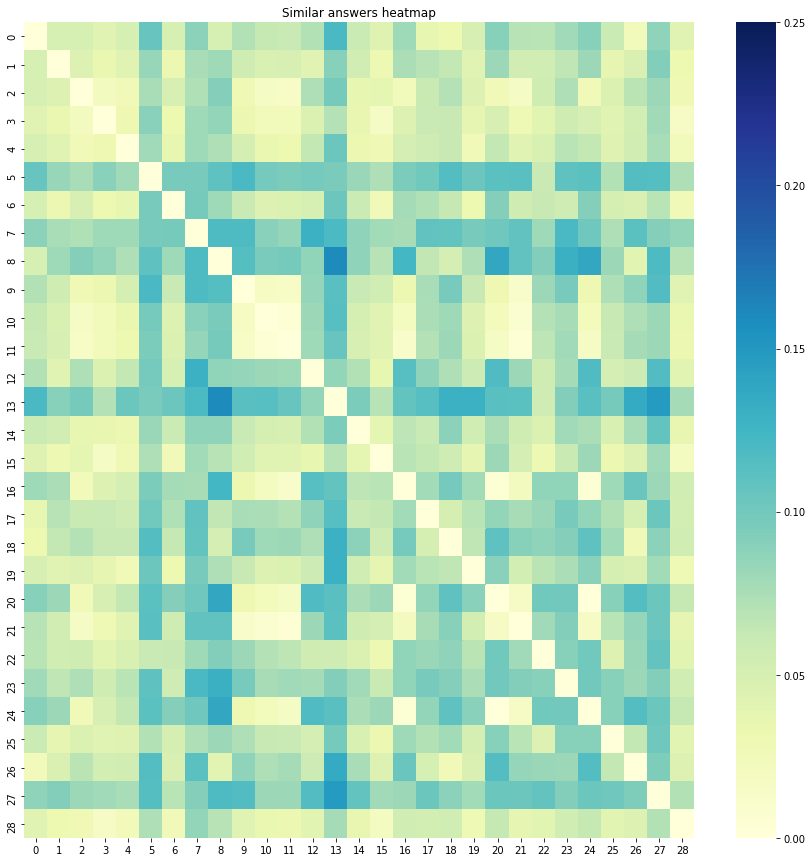

In [0]:
plot_similarity_matrix(matrix, 'Similar answers heatmap')

In [0]:
print(first_answer.student_answer)

0     high risk problems address prototype program s...
1     simulate portions desired final product quick ...
2     prototype program simulates behaviors portions...
3     defined specification phase prototype stimulat...
4     let users idea completed program allow clients...
5                 find problem errors program finalized
6     address major issues creation program. way acc...
7     break program prototype programs simulate part...
8     -to provide example model finished program per...
9     simulating behavior portion desired software p...
10    program stimulates behavior portions desired s...
11    program simulates behavior portions desired so...
12    lay basics starting point actual problem solving.
13               simulate problem solving parts problem
14    prototype program provides basic groundwork en...
15    prototype program specification phase software...
16    program simulates behavior portions desired so...
17    provides limited proof concept verify clie